# Assignment 4: Visualizations Solutions

This assignment covers **Chapters 9** from the [textbook](https://wesmckinney.com/book/) as well as lecture material from Weeks 9-10. Please complete this assignment by providing answers in cells after the question. Use **Code** cells to write and run any code you need to answer the question and **Markdown** cells to write out answers in words. After you are finished with the assignment, remember to download it as an **HTML file** and submit it in **ELMS**.

This assignment is due by **11:59pm on Friday, November 15**.

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from  matplotlib.ticker import PercentFormatter
import seaborn as sns
import plotly.express as px

In this assignment, you will use three different datasets provided to you in CSV files to create visualizations and answer questions about relationships within the data. These are datasets that we have already worked with and that you should already be familiar with.

## Data

First, the Pulse of the Nation dataset contains responses to survey questions.

In [4]:
data_file = '201807-CAH_PulseOfTheNation_Raw.csv'
df = pd.read_csv(data_file)
df.head()

,gender,age,age_range,political_party,rep_change,dem_change,political_leaning,education,race,race_other,...,stereotypes,respect_for_authority,handout,climate_change,epa,biz_regulations,nuclear_emissions,voter_turnout_help,american_heartland,south_racist
0,Female,55,55-64,Independent,NaN,NaN,Moderate,Some college,White,NaN,...,Yes,Strongly Agree,Strongly Disagree,Well-informed,No,Yes,Yes,Help Democrats more,Yes,Yes
1,Female,34,25-34,Strong Democrat,NaN,No,Strong Liberal,Graduate degree,White,NaN,...,Yes,Strongly Disagree,Strongly Disagree,Well-informed,No,No,Yes,Help Democrats more,No,DK/REF
2,Male,49,45-54,DK/REF,NaN,NaN,Moderate,College degree,White,NaN,...,DK/REF,Strongly Agree,Somewhat Agree,Well-informed,No,No,Yes,DK/REF,Yes,No
3,Male,41,35-44,Independent,NaN,NaN,Strong Conservative,High school or less,White,NaN,...,Yes,Strongly Agree,Strongly Agree,Not Very Well-informed,Yes,Yes,DK/REF,Make no Difference,Yes,No
4,Female,65,65+,Independent,NaN,NaN,Moderate,Graduate degree,White,NaN,...,Yes,Somewhat Disagree,Somewhat Disagree,Well-informed,No,No,Yes,Help Democrats more,Yes,Yes


The `md_anxiety.csv` file has responses to the anxiety question from the COVIDcast symptom survey (https://delphi.cmu.edu/covidcast/) aggregated by county for counties in Maryland over a period of time in May and June in 2022. Some counties do not have full data due to lack of sufficient responses.

In [5]:
data_file = 'md_anxiety.csv'
md_anxiety = pd.read_csv(data_file)
md_anxiety.head()

,NAME,day,percent_anxious
0,"Anne Arundel County, Maryland",2022-05-19,14.799449
1,"Baltimore County, Maryland",2022-05-01,15.635284
2,"Baltimore County, Maryland",2022-05-03,12.912819
3,"Baltimore County, Maryland",2022-05-04,14.203134
4,"Baltimore County, Maryland",2022-05-05,16.371993


## Visualizations

Create an appropriate visualization that answers each of the questions below. Make sure that you include a title, appropriate x- and y-axis labels, and a descriptive legend for each. Each graph should be clear, and there should be no overlapping elements covering up parts of the visualization. Provide a 1-2 sentence interpretation of each visualization.



## **Pulse of the Nation**


### 1) What is the relationship between political leaning and opinions on whether voting in federal elections should be mandatory or optional?

Its probably a good idea to start by creating properly ordered categorical variables for `political_leaning` and `mandatory_election` so that we can plot them in the correct order: 

In [6]:
ideology_ordering = ['DK/REF', 'Strong Conservative', 'Not Very Strong Conservative', 'Moderate', 'Not Very Strong Liberal', 'Strong Liberal']
mandatory_election_ordering = ['DK/REF', 'Optional', 'Mandatory']

df['political_leaning_categorical'] =  pd.Categorical(df['political_leaning'], categories = ideology_ordering)
df['mandatory_election_categorical'] =  pd.Categorical(df['mandatory_election'], categories = mandatory_election_ordering)


In [7]:
# make a cross tab with % of each response for mandatory election: 
election_proportions = pd.crosstab(df['political_leaning_categorical'], df['mandatory_election_categorical'], normalize='index')
election_proportions


mandatory_election_categorical,DK/REF,Optional,Mandatory
political_leaning_categorical,,,
DK/REF,0.119048,0.678571,0.202381
Strong Conservative,0.027174,0.798913,0.173913
Not Very Strong Conservative,0.060000,0.800000,0.140000
Moderate,0.033639,0.730887,0.235474
Not Very Strong Liberal,0.000000,0.687500,0.312500
Strong Liberal,0.028037,0.700935,0.271028


#### Using Matplot

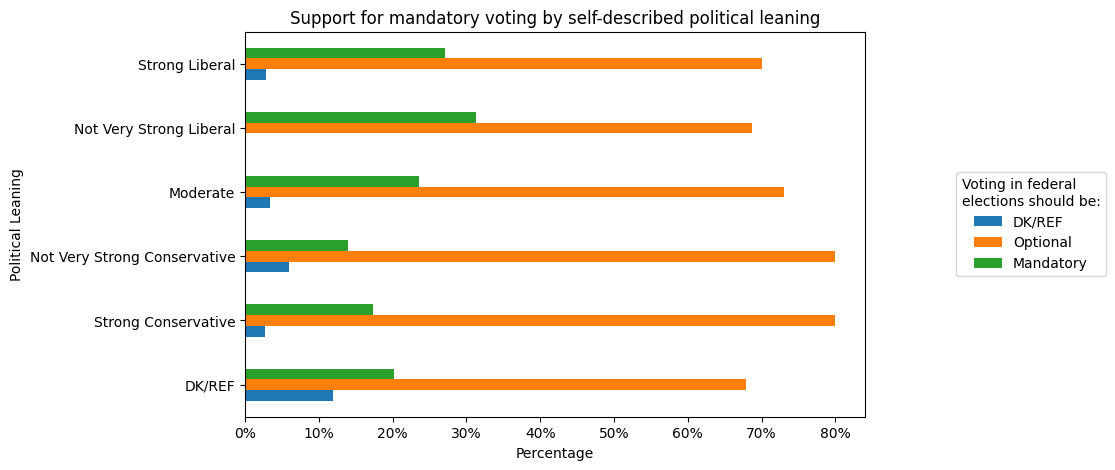

In [8]:
import matplotlib.ticker as mtick # mtick to allow for percentage formatting of axis ticks
 # the base plot: a horizontal stacked barplot:

ax = election_proportions.plot(stacked=False, # change to true for a stacked bar plot
                               kind='barh',
                               xlabel="Percentage",
                               ylabel = 'Political Leaning',
                               title = 'Support for mandatory voting by self-described political leaning',
                               figsize=(8,5)
                              )
plt.legend( 
    title = 'Voting in federal\nelections should be:', # a legend title
    loc='center right',   # relative location of the legend
    bbox_to_anchor=[1.4, .5] # offset from the plot (allows us to put the legend outside of the plotting space)
          ) 
# formatting the axes as percentages
ax.xaxis.set_major_formatter(mtick.PercentFormatter(1.0))

plt.show()


#### Seaborn

An alternative method would be to use the `catplot` function from Seaborn

In [ ]:
# make a long format version of the crosstab
el_long = election_proportions.stack().reset_index().rename(columns={0:'proportion'})
el_long

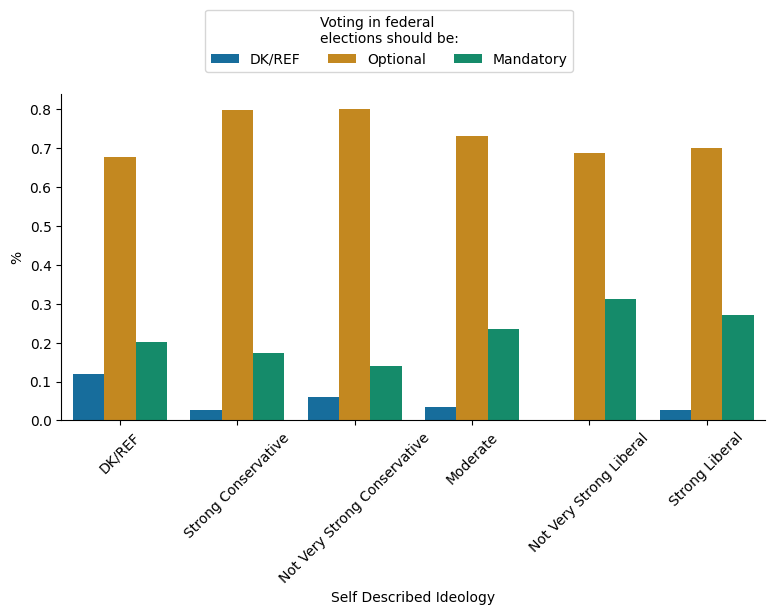

In [22]:
# make the plot with catplot 
barplot = sns.catplot(
    data= el_long, 
    x='political_leaning_categorical', 
    hue= 'mandatory_election_categorical',
    y='proportion',
    kind="bar", 
    height=4, aspect=2,
    # using a color-blind friendly palette
    palette='colorblind'
)
# add a n axis label
barplot.set_axis_labels("Self Described Ideology", "%")
# relocate the legend and add a title
sns.move_legend(barplot, 
                title='Voting in federal\nelections should be:', 
                loc='lower center',
                bbox_to_anchor=(.4,1),
                frameon=True,
                ncol=3
            
               )
# rotate the axis tick marks 45 degrees to avoid overlap
barplot.set_xticklabels(rotation=45)

plt.show()


#### Using Plotly Express

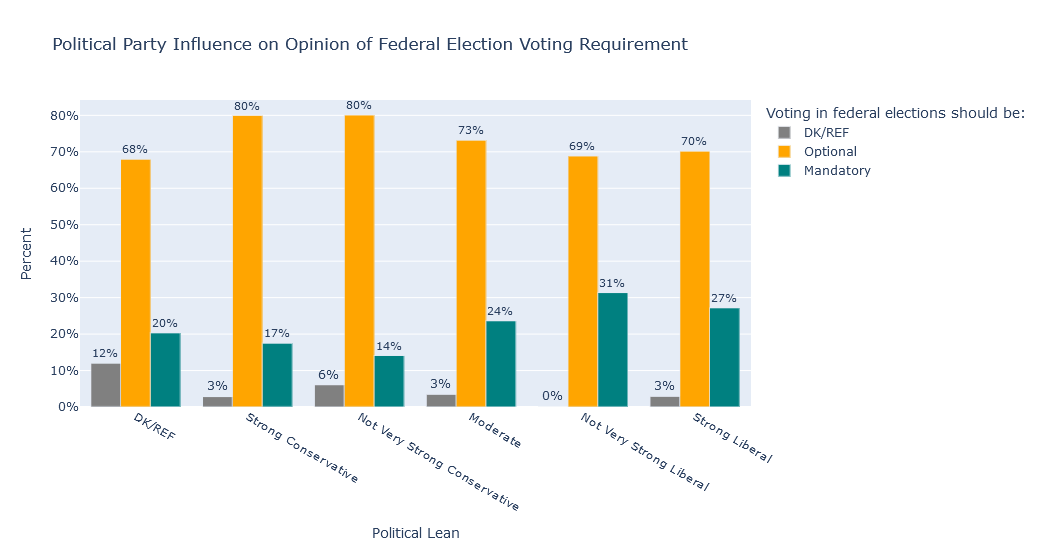

In [55]:
fig = px.bar(election_proportions, y= election_proportions.columns, x = election_proportions.index, 
                # orientation = 'h', # uncomment this line for a horizontal plot
                
                # x and y axis labels as a key:value dictionary
                 labels={"political_leaning_categorical": "Political Lean",
                         "value": "Percent", 
                         "mandatory_election_categorical" : 'Voting in federal\nelections should be:'},
                 barmode='group',
                 width = 1000,
                 height = 550,
                 # manually setting a color map for the bars
                 color_discrete_sequence=['gray', 'orange', 'teal'],
                 title="Political Party Influence on Opinion of Federal Election Voting Requirement",
                 
            
            )
# add % labels over each bar
fig.update_traces(texttemplate='%{y:.0%}', textposition='outside')
# make the y axis formatted as %
fig.update_layout(yaxis_tickformat = '.0%')
fig.show()

### 2) What is the relationship between age and agreeing or disagreeing with the statement that "people need to have more respect for authority in this country"?

As with the previous example, its a good idea to reorder the categories first:


In [23]:
df.respect_for_authority.value_counts().sort_index()

respect_for_authority
DK/REF                68
Somewhat Agree       176
Somewhat Disagree     90
Strongly Agree       415
Strongly Disagree     51
Name: count, dtype: int64

In [24]:
agree_ordering = ['DK/REF','Strongly Disagree', 'Somewhat Disagree', 'Somewhat Agree', 'Strongly Agree']

df['respect_for_authority_cat'] =  pd.Categorical(df['respect_for_authority'], categories = agree_ordering)

In [25]:
df.respect_for_authority_cat.value_counts().sort_index()

respect_for_authority_cat
DK/REF                68
Strongly Disagree     51
Somewhat Disagree     90
Somewhat Agree       176
Strongly Agree       415
Name: count, dtype: int64

#### Using a categorical measure of age

We have two options here: would use the `age_range` variable to make a categorical-by-categorical comparison, or we could just use the numeric `age` to compare ages across different responses to the respect for authority question. We'll start with looking at the categorical version. 

In [59]:
# double-check the ordering (in this case the original was actually fine, but I'm including still because its good practice)
age_ordering = ['18-24', '25-34', '35-44', '45-54', '55-64', '65+']
df['age_cat'] =  pd.Categorical(df['age_range'], categories = age_ordering)
df.age_cat.value_counts().sort_index()





age_cat
18-24     30
25-34     44
35-44     71
45-54    121
55-64    159
65+      375
Name: count, dtype: int64

In [60]:
resp_auth_prop  = pd.crosstab(df['age_cat'], df['respect_for_authority_cat'], normalize='index')
resp_auth_prop

respect_for_authority_cat,DK/REF,Strongly Disagree,Somewhat Disagree,Somewhat Agree,Strongly Agree
age_cat,,,,,
18-24,0.033333,0.033333,0.233333,0.400000,0.300000
25-34,0.090909,0.136364,0.181818,0.295455,0.295455
35-44,0.056338,0.084507,0.183099,0.366197,0.309859
45-54,0.049587,0.066116,0.132231,0.198347,0.553719
55-64,0.088050,0.069182,0.081761,0.188679,0.572327
65+,0.104000,0.050667,0.088000,0.189333,0.568000


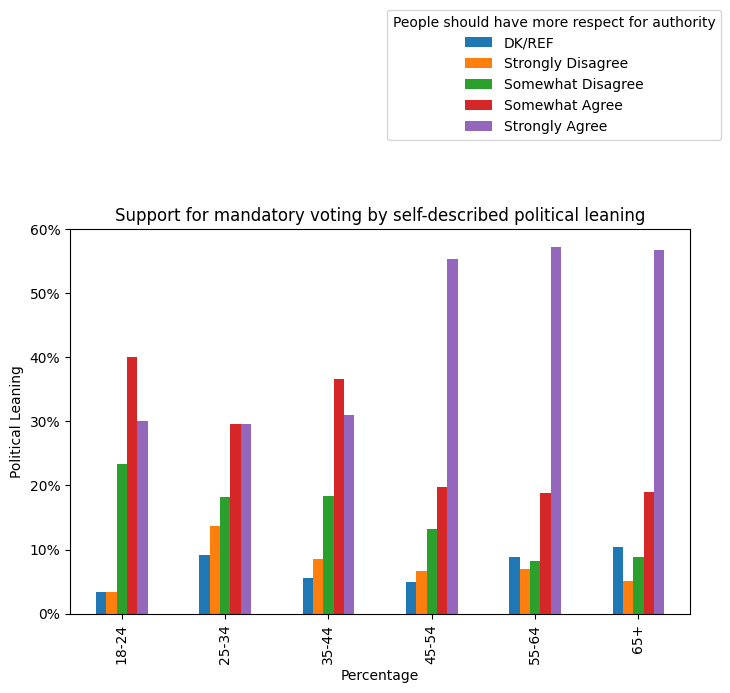

In [61]:
ax = resp_auth_prop.plot(stacked=False, # change to true for a stacked bar plot
                               kind='bar',
                               xlabel="Percentage",
                               ylabel = 'Political Leaning',
                               title = 'Support for mandatory voting by self-described political leaning',
                               figsize=(8,5)
                              )
plt.legend( 
    title = 'People should have more respect for authority', # a legend title
    loc='center left',   # relative location of the legend
    bbox_to_anchor=[.5, 1.4] # offset from tbhe plot (allows us to put the legend outside of the plotting space)
          ) 
# formatting the axes as percentages
ax.yaxis.set_major_formatter(mtick.PercentFormatter(1.0))
plt.show()

#### Using a continuous measure of age
Since we have a continuous variable (age) and a categorical variable (respect for authority) a good option is to use a boxplot: 

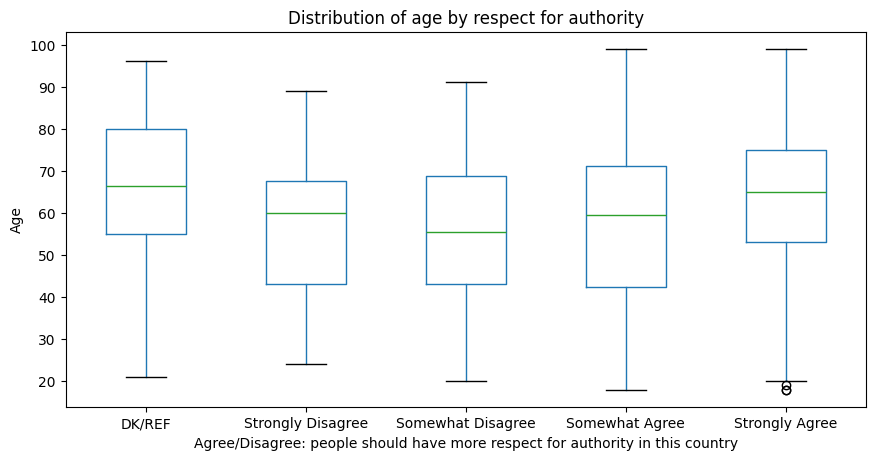

In [62]:
plot = df.boxplot('age', by='respect_for_authority_cat', 
                 figsize=(10,5 ),
                  xlabel="Agree/Disagree: people should have more respect for authority in this country",
                  ylabel = 'Age',
                  
                  grid=False # turn off graphic grid
 
                 )
plt.suptitle('') # remove default subtitle 
plot.set_title("Distribution of age by respect for authority") # add descriptive title
plt.show()


Another option would be to create a violin plot using Seaborn. Violin plots combine a kernel density plot with a box plot: 

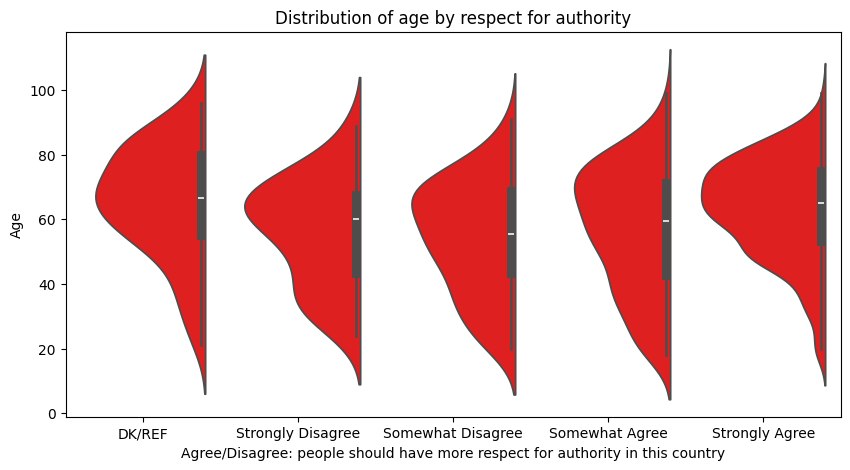

In [63]:
f, ax = plt.subplots(figsize=(10, 5))
sns.violinplot(data=df, y='age', x='respect_for_authority_cat', color='red',  
               # split avoids drawing the mirror image of each density plot
               split=True)
ax.set(ylabel = 'Age', xlabel="Agree/Disagree: people should have more respect for authority in this country", 
      title = "Distribution of age by respect for authority"
      )

plt.show()

### **MD Anxiety**



#### 1) What are the overall trends for Montgomery County and Prince George's County in the levels of anxiety over time? Are there any specific periods of time where it looks like anxiety was particularly high in either or both counties? Use a line plot to answer this question.

While not strictly required, I might also want to use abbreviated date labels in my plot. There's only 1 year worth of data here, and so including the entire 4 digit year on the tick marks is kind of redundant. I can convert the `day` column to Month Day format using the code below: 


In [64]:
# If you wanted abbreviated dates, consider using: 
days = pd.to_datetime(md_anxiety['day'])
md_anxiety['days_format'] =  days.dt.strftime("%b %d") 
# read more about strftime formatting marks here https://docs.python.org/3/library/time.html#time.strftime
# look at the new formatting
md_anxiety.head()

,NAME,day,percent_anxious,days_format
0,"Anne Arundel County, Maryland",2022-05-19,14.799449,May 19
1,"Baltimore County, Maryland",2022-05-01,15.635284,May 01
2,"Baltimore County, Maryland",2022-05-03,12.912819,May 03
3,"Baltimore County, Maryland",2022-05-04,14.203134,May 04
4,"Baltimore County, Maryland",2022-05-05,16.371993,May 05


Next, I'll make a subset of the data to include just Montgomery and PG county:

In [65]:
mocopg = ["Montgomery County, Maryland", "Prince George's County, Maryland"]
mc_pg = md_anxiety.loc[md_anxiety['NAME'].isin(mocopg)]
# just confirming we've correctly subsetted our data:
mc_pg.value_counts('NAME')

NAME
Montgomery County, Maryland         56
Prince George's County, Maryland    56
Name: count, dtype: int64

In [66]:
mc_pg.days_format

45     May 01
46     May 02
47     May 03
48     May 04
49     May 05
        ...  
152    Jun 21
153    Jun 22
154    Jun 23
155    Jun 24
156    Jun 25
Name: days_format, Length: 112, dtype: object

#### Using Matplot

Finally, I'll create my lineplot. We can use either Matplot or Seaborn here, but Seaborn allows us to create two lines without having to do any additional reshaping of the data, so it saves us a step. I'll also use the `AutoDateLocator` function to space my axis labels out a little further. (try commenting this line out to see the difference)

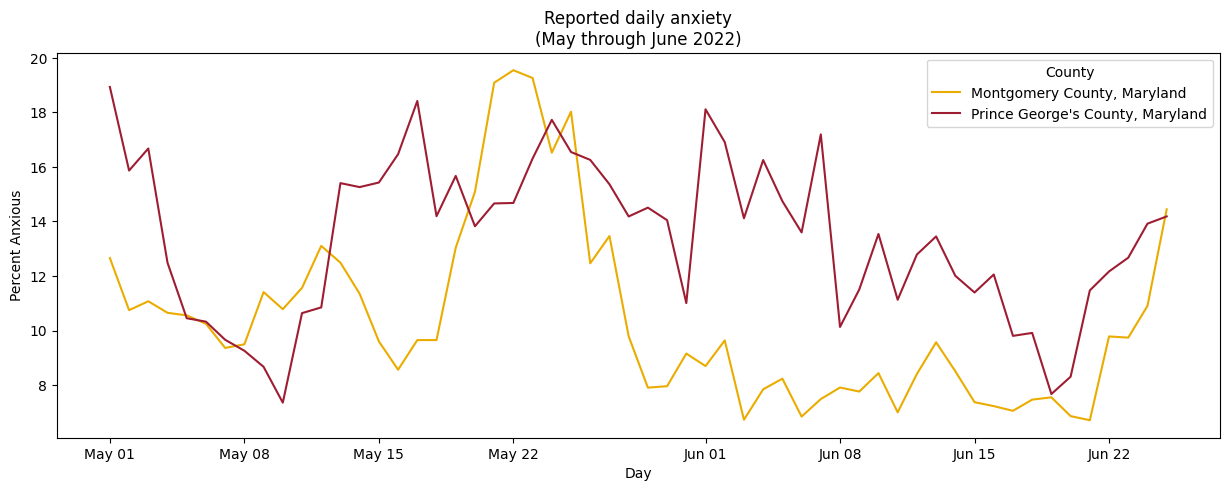

In [69]:
import matplotlib.dates as mdates # date axis formatting functions 
f, ax = plt.subplots(figsize=(15, 5))
sns.lineplot(data=mc_pg, 
             x='days_format', 
             y='percent_anxious', 
             hue='NAME',
             # adding a color mapping (hex codes from: https://en.wikipedia.org/wiki/Flag_of_Maryland#Color_scheme)
             palette = {
                 "Montgomery County, Maryland":'#EBAC00', 
                 "Prince George's County, Maryland":'#9E1D32'
             }
            )

# setting automatic date tick marks for a less crowded plotting space
ax.xaxis.set_major_locator(mdates.AutoDateLocator())
ax.set(xlabel='Day', ylabel='Percent Anxious', 
       title ='Reported daily anxiety\n(May through June 2022)')
# adding a descriptive legend title
plt.legend( 
    title = 'County')
plt.show()

#### Using Plotly

Or we could use plotly to make an interactive plot here. Plotly is already fairly smart about how it creates tick marks, so we can just pass the original `day` column as our x-axis. You can hover over a point on this plot to see the exact % of anxiety reported on each day 

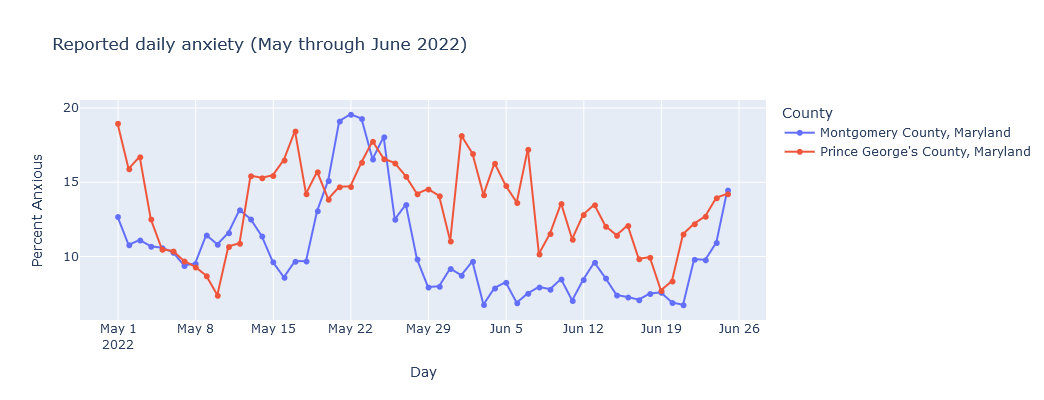

In [71]:
fig = px.line(mc_pg, x='day', 
              y='percent_anxious', 
              color='NAME', 
              width=1000, 
              height=400,
              title ='Reported daily anxiety\n(May through June 2022)',
              # assigning labels 
              labels = {'NAME': 'County', 
                       'percent_anxious' : 'Percent Anxious',
                        'day':'Day'
                       })
fig.update_traces(mode="markers+lines", 
                  hovertemplate='%{y:.2r}%') # rounds y to the nearest 1 digit and then appends a % sign to the hover text
# x_unified links the tooltip for both plots together (probably easier to understand if you try it)
fig.update_layout(hovermode="x unified")
fig.show()

#### 2) Does it look like there is a relationship between anxiety levels in Montgomery County and in Prince George's County overall? Use a scatterplot to answer this question.

*Hint:* This requires some reshaping of the data. Look back at previous work on reshaping data and think about what form the data needs to be in. 


We'll need to reshape this data from long format (each row indicates a single county-day) to wide format (each row represents a single day with separate columns for each county). We can do this using the `pivot` function. The `index

In [73]:
mc_pg_wide = mc_pg.pivot(index='days_format', columns='NAME', values='percent_anxious')

mc_pg_wide.head()

NAME,"Montgomery County, Maryland","Prince George's County, Maryland"
days_format,,
Jun 01,8.695918,18.111952
Jun 02,9.636442,16.907931
Jun 03,6.727425,14.116485
Jun 04,7.844726,16.250811
Jun 05,8.233006,14.741601


#### Using Matplot

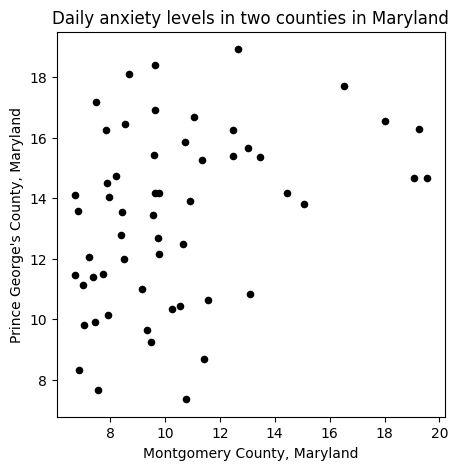

In [74]:
#OR: 
# f, ax = plt.subplots(figsize=(15, 5))
# ax= sns.scatterplot(data=mc_pg_wide, x="Montgomery County, Maryland", y="Prince George's County, Maryland")
mc_pg_wide.plot(x="Montgomery County, Maryland", 
                y="Prince George's County, Maryland", 
                kind='scatter',
                title = 'Daily anxiety levels in two counties in Maryland',
                color='black',
                 figsize=(5,5)
               )

plt.show()


#### Using Seaborn and adding a line of best fit

Alternatively, the Seaborn Package has a nice built-in function to make a scatter plot that includes a line of best fit that summarizes the relationship between the X and Y variables. 

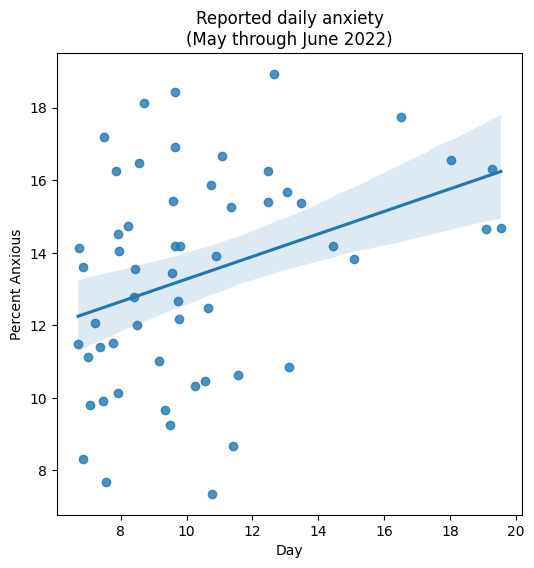

In [75]:
f, ax = plt.subplots(figsize=(6, 6))
ax=sns.regplot(data=mc_pg_wide, x="Montgomery County, Maryland", 
              y="Prince George's County, Maryland"
                )
ax.set(xlabel='Day', ylabel='Percent Anxious', 
       title ='Reported daily anxiety\n(May through June 2022)')
plt.show()



### Using Plotly Express

If we install the `statsmodels` package, we can do the same thing in a plotly express plot. 

In [76]:
# uncomment to install:
#%pip install statsmodels

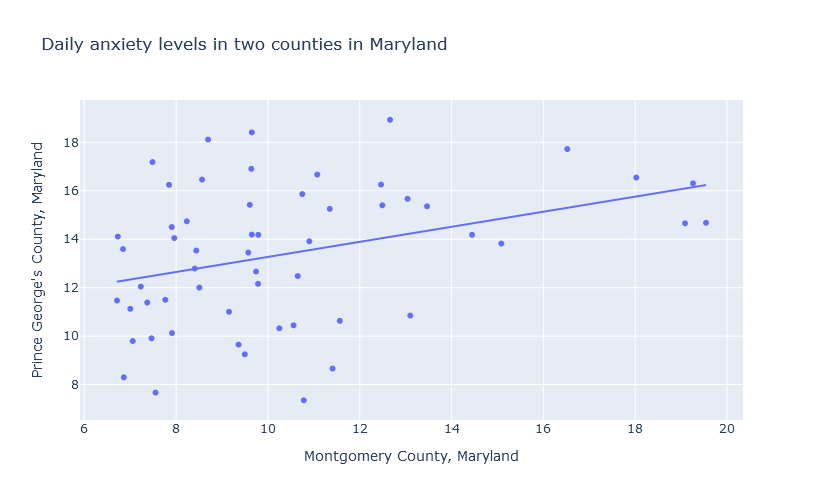

In [91]:
px_fig = px.scatter(mc_pg_wide, 
                    x="Montgomery County, Maryland", 
                    y="Prince George's County, Maryland",
                    height=500,
                    width= 500,
                    title = 'Daily anxiety levels in two counties in Maryland',
                    # adds the OLS line of best fit
                    trendline='ols'
                 # uncomment to draw marginal histograms:
                  # , marginal_x='histogram' 
                  #  ,  marginal_y='histogram' 
                   )

px_fig.show()
